In [142]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Ridge

In [143]:
#importing data
df = pd.read_csv(r"A:\data science data sets\linear regression\Salary_dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [144]:
#Unnamed: 0 column is same as like index column we can drop that column
df.drop(columns="Unnamed: 0",axis = 1,inplace = True)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [160]:
#null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [161]:
#duplicate values
df.duplicated().sum()

0

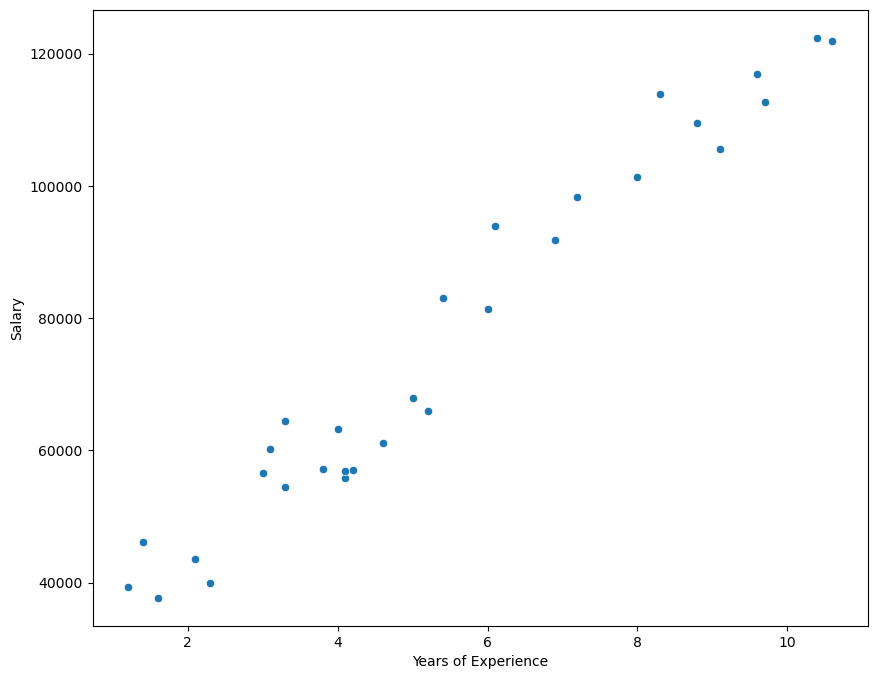

In [145]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x="YearsExperience",y="Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [146]:
#seperating the data set into dependent and independent features
x=df["YearsExperience"]
y=df["Salary"]
x.shape

(30,)

In [147]:
#reshaping the values of independent variables from 1-D to 2-D
x = pd.DataFrame(x)
x.shape

(30, 1)

In [148]:
#split  train data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
#sizes of test and train data
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(24, 1) (6, 1) (24,) (6,)


In [149]:
#training the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [150]:
print("the slope co-efficient:" ,model.coef_)
print("the intercept:" ,model.intercept_)

the slope co-efficient: [9332.94473799]
the intercept: 24677.603524555554


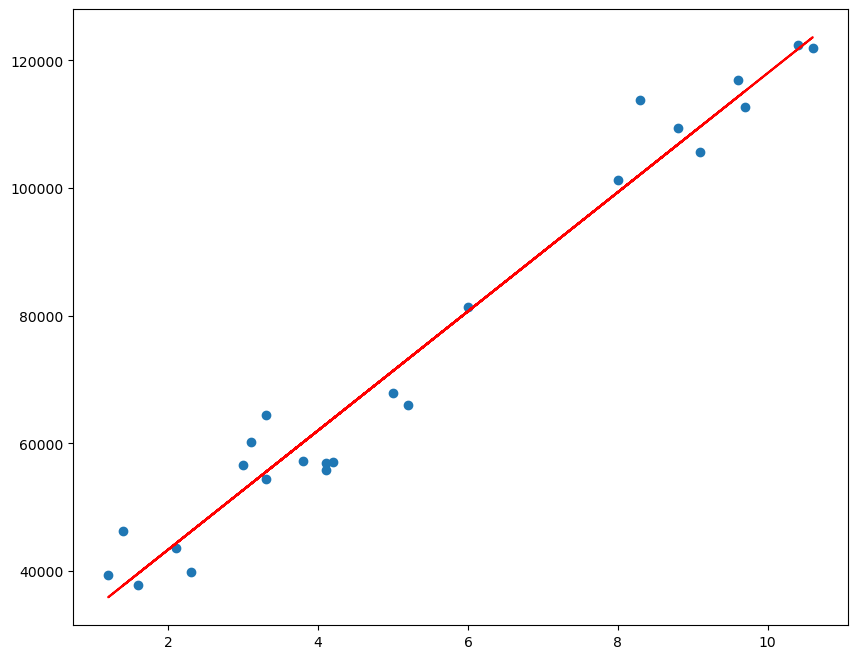

In [151]:
plt.figure(figsize=(10,8))
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),c="r")
plt.show()

In [152]:
y_pred = model.predict(x_test)
print(y_pred,y_test)

[75075.50510972 91874.8056381  62009.38247653 81608.56642631
 67609.14931932 89074.92221671] 17    83089.0
21    98274.0
10    63219.0
19    93941.0
14    61112.0
20    91739.0
Name: Salary, dtype: float64


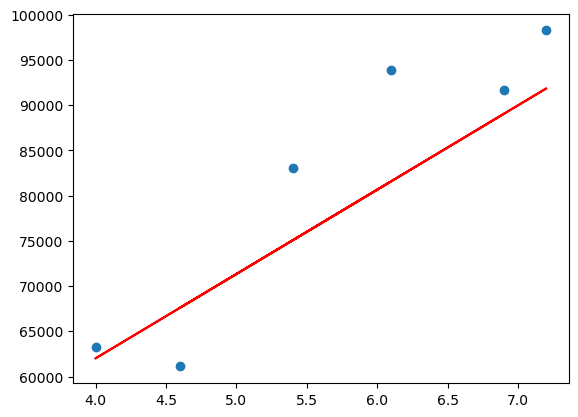

In [153]:
#prediction plot
plt.scatter(x_test,y_test)
plt.plot(x_test,model.predict(x_test),c="r")

In [154]:
ad_r2 = 1-((1-r2_score(y_test,y_pred))*(len(y_test)-1))/(len(y_test)-x_test.shape[1]-1)

In [155]:
#performance metrics
print("Mean Squared Error :" ,mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:' ,mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:" ,np.sqrt(mean_squared_error(y_test,y_pred)))
print('R score:' ,r2_score(y_test,y_pred))
print("Adjusted r score:", ad_r2)

Mean Squared Error : 51338023.49224833
Mean Absolute Error: 6185.994575326626
Root Mean Squared Error: 7165.0557215033805
R score: 0.7616681465472098
Adjusted r score: 0.7020851831840123


In [174]:
ridge = Ridge(alpha=0.01)
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [175]:
y_ridge_pred = ridge.predict(x_test)

In [176]:
ad_r2 = 1-((1-r2_score(y_test,y_ridge_pred))*(len(y_test)-1))/(len(y_test)-x_test.shape[1]-1)

In [177]:
#performance metrics
print("Mean Squared Error :" ,mean_squared_error(y_test,y_ridge_pred))
print('Mean Absolute Error:' ,mean_absolute_error(y_test,y_ridge_pred))
print("Root Mean Squared Error:" ,np.sqrt(mean_squared_error(y_test,y_ridge_pred)))
print('R score:' ,r2_score(y_test,y_ridge_pred))
print("Adjusted r score:", ad_r2)

Mean Squared Error : 51342043.21154318
Mean Absolute Error: 6186.24586065928
Root Mean Squared Error: 7165.336224598479
R score: 0.7616494853856626
Adjusted r score: 0.7020618567320782


In [179]:
import os
notebook_path = os.path.abspath("path/to/your/notebook.ipynb")
print(f"Notebook path: {notebook_path}")

Notebook path: C:\Users\deept\path\to\your\notebook.ipynb
